<a href="https://colab.research.google.com/github/amanjain487/tsai-eva6/blob/main/Assignments/S8/Advanced%20Training%20Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%rm -rf 'CIFAR_10'
!git clone https://github.com/amanjain487/CIFAR_10

Cloning into 'CIFAR_10'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 245 (delta 118), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (245/245), 57.56 KiB | 1.60 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [2]:
import sys
sys.path.append('/CIFAR_10/')

!pip install git+https://github.com/albumentations-team/albumentations.git


  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-37xsooaj
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-37xsooaj
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98174 sha256=38b743611afaf1c88c2143de5472ad971372274a5a0ab6c126b5c8673bb6f47f
  Stored in directory: /tmp/pip-ephem-wheel-cache-qbunjs57/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [3]:
from CIFAR_10.models import resnet

In [4]:
from CIFAR_10 import utils
from CIFAR_10 import main

In [5]:
device, best_acc, classes, net, criterion, optimizer, scheduler = main.define_model_utilities()

In [6]:
!pip install torchsummary
from torchsummary import summary

summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 34, 34]           1,728
         GroupNorm-2           [-1, 64, 34, 34]             128
            Conv2d-3           [-1, 64, 34, 34]          36,864
         GroupNorm-4           [-1, 64, 34, 34]             128
            Conv2d-5           [-1, 64, 34, 34]          36,864
         GroupNorm-6           [-1, 64, 34, 34]             128
        BasicBlock-7           [-1, 64, 34, 34]               0
            Conv2d-8           [-1, 64, 34, 34]          36,864
         GroupNorm-9           [-1, 64, 34, 34]             128
           Conv2d-10           [-1, 64, 34, 34]          36,864
        GroupNorm-11           [-1, 64, 34, 34]             128
       BasicBlock-12           [-1, 64, 34, 34]               0
           Conv2d-13          [-1, 128, 17, 17]          73,728
        GroupNorm-14          [-1, 128,

In [7]:
tensor_transforms, numpy_transforms = utils.train_transform(["totensor", "normalize_mean", "randomcrop", "horizontal_flip", "cutout", "random_rotate"])

In [8]:
train_set, test_set = utils.load_dataset(tensor_transforms, numpy_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
train_loader, test_loader = main.dataloaders(train_set, test_set)

In [10]:
train_loss, train_acc, test_loss, test_acc = main.start_training(0, net, criterion, optimizer, device, train_loader, test_loader, best_acc, scheduler)

Best Acc is :  0


In [11]:
correct_images, incorrect_images = utils.identify_images(net, criterion, device, test_loader, 20)

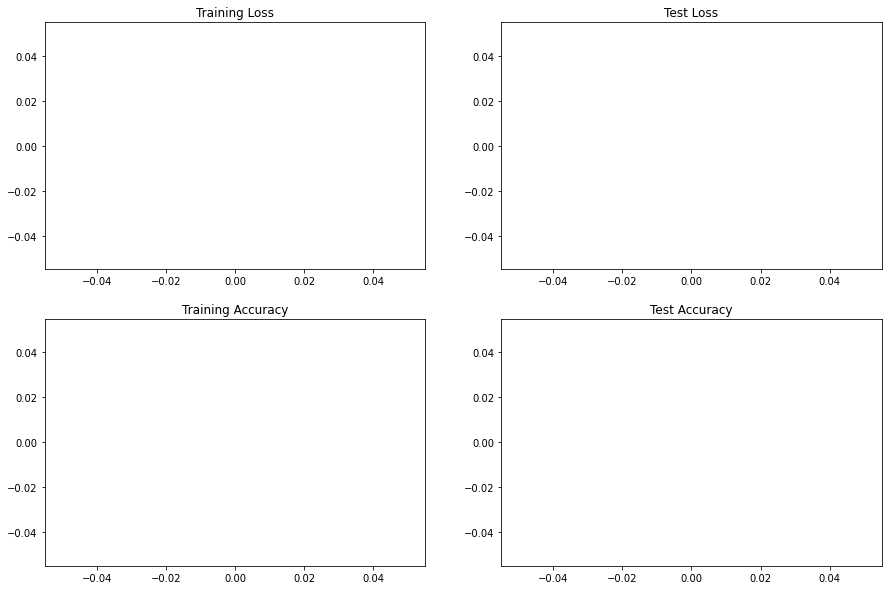

In [12]:
utils.plot_graph(train_loss, train_acc, test_loss, test_acc)

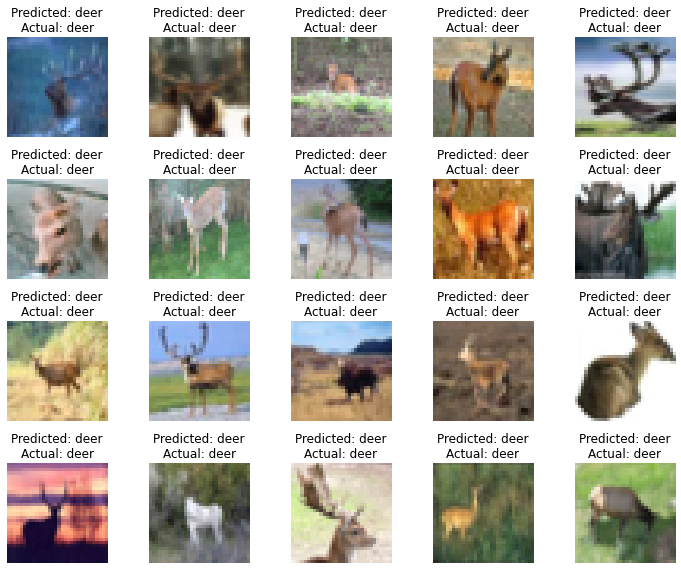

In [13]:
utils.plot_images(correct_images, classes)

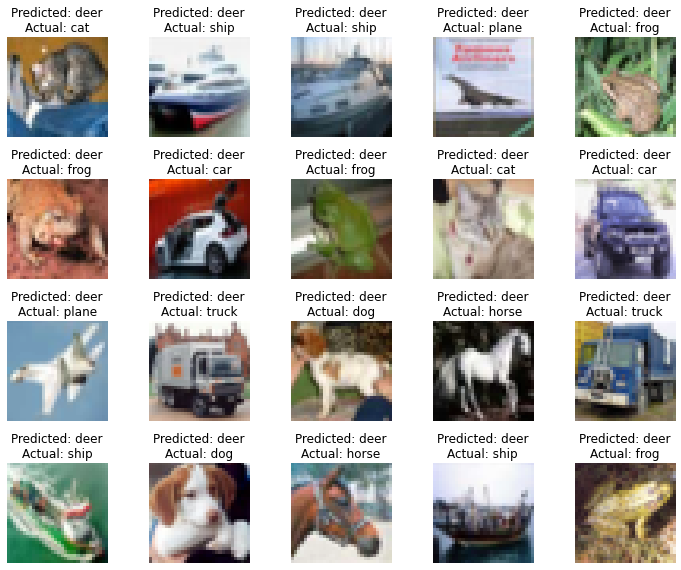

In [14]:

utils.plot_images(incorrect_images, classes)

In [15]:
from CIFAR_10.GradCAM.visualize import VisualizeCam
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(net,classes, target_layers)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


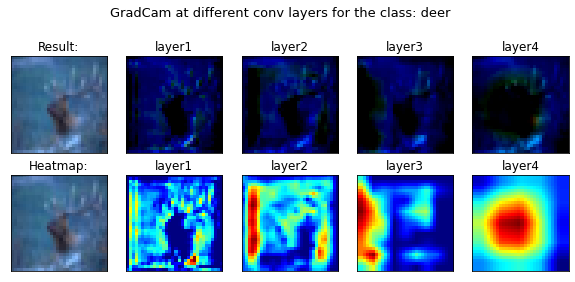

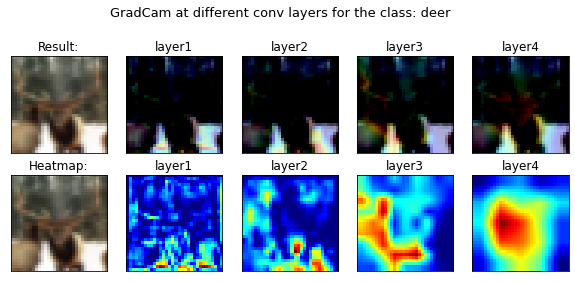

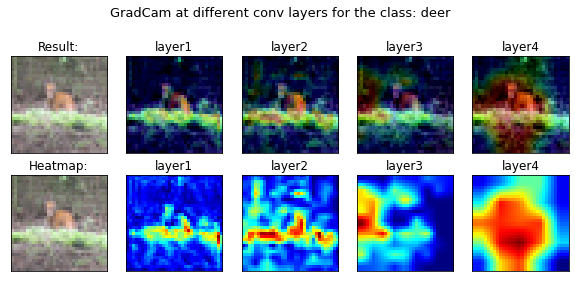

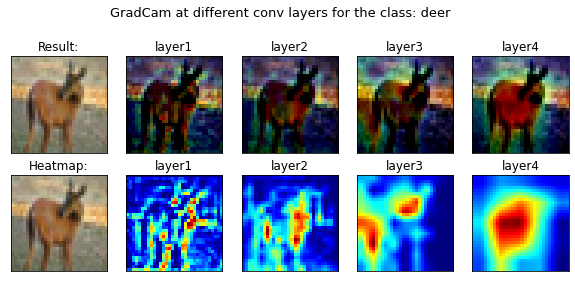

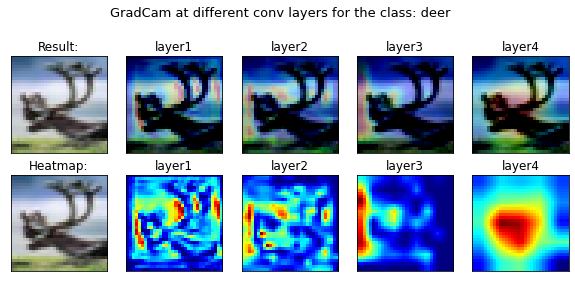

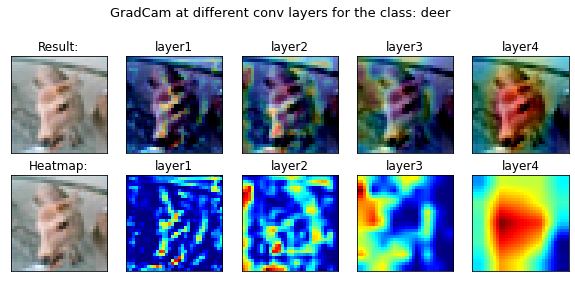

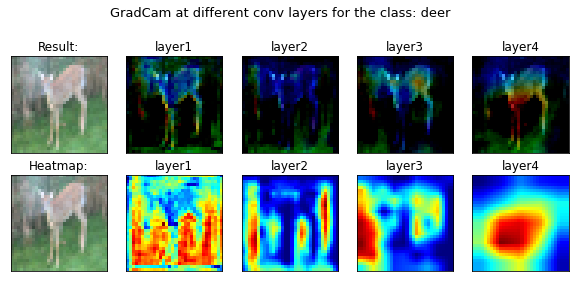

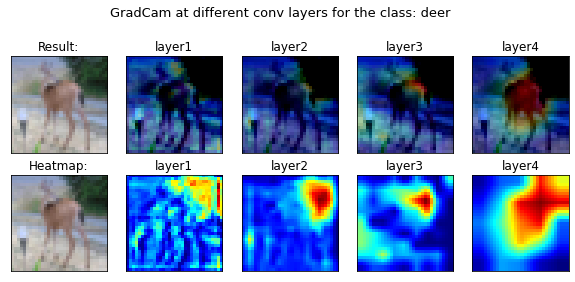

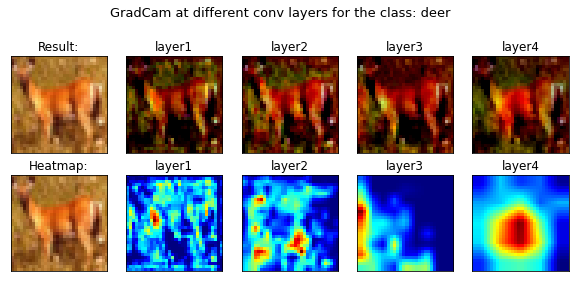

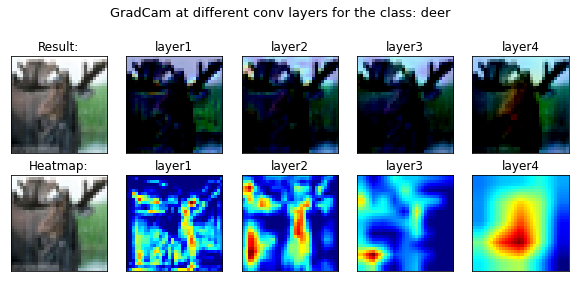

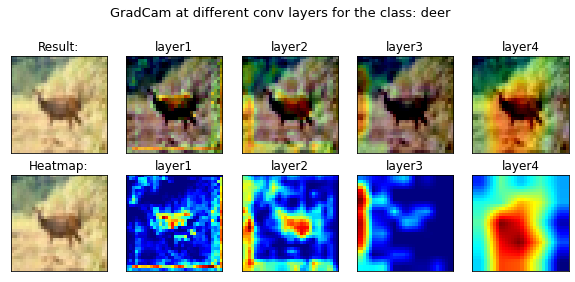

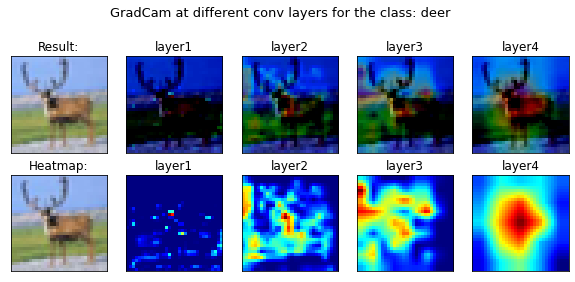

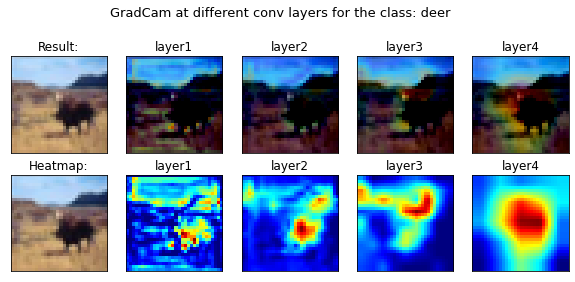

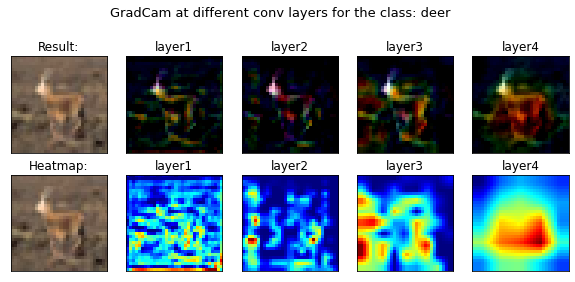

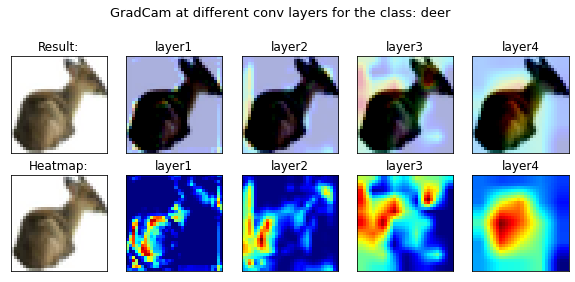

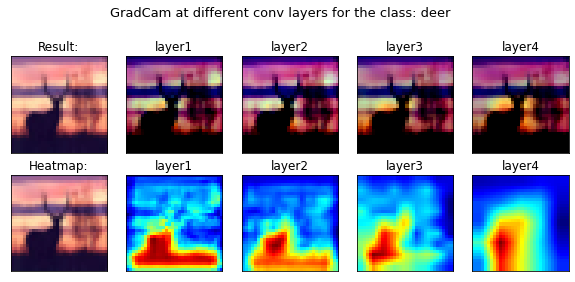

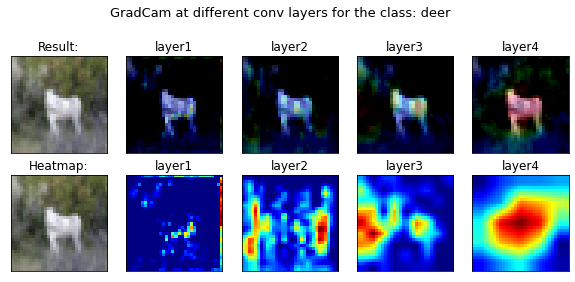

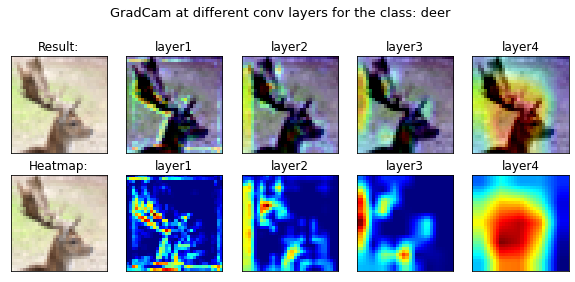

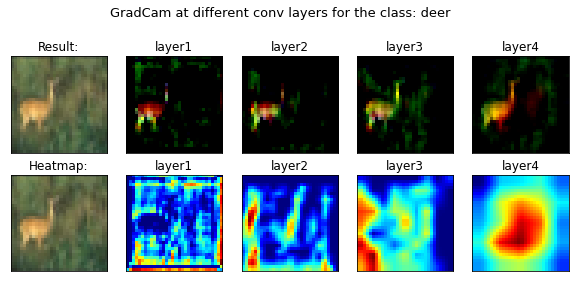

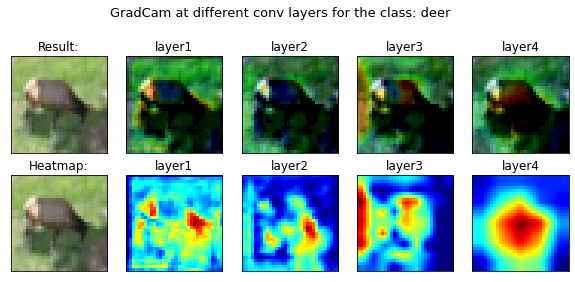

In [16]:
import torch
num_img = 20
correct_pred_imgs = []
count = 0
for i in range(num_img):
  correct_pred_imgs.append(torch.as_tensor(correct_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, metric="correct")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


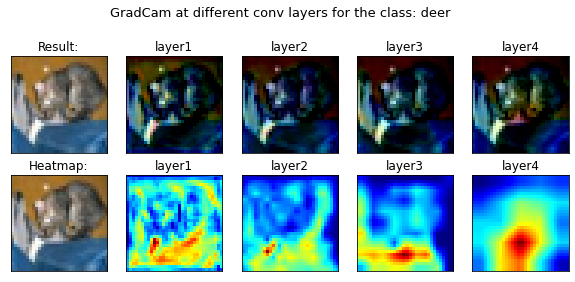

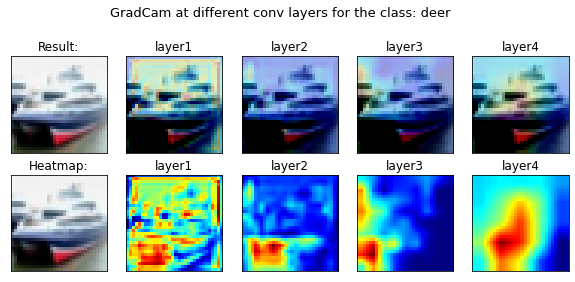

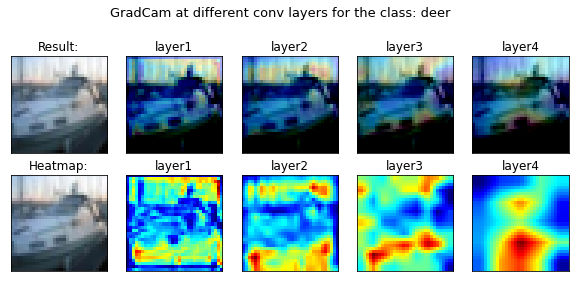

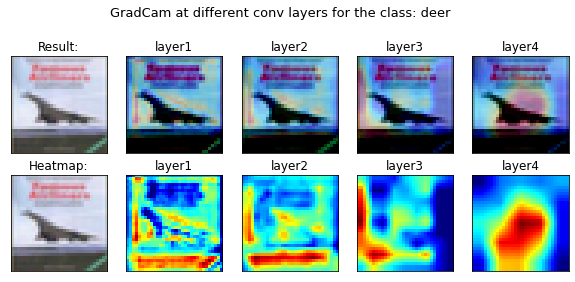

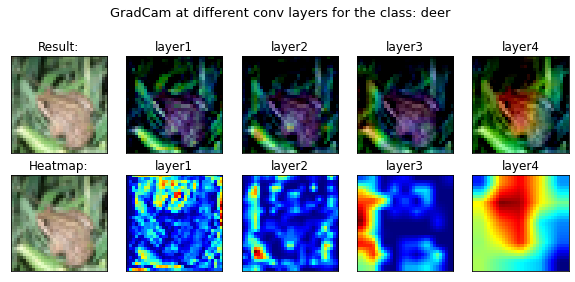

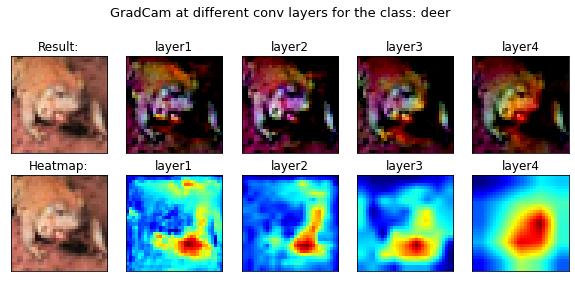

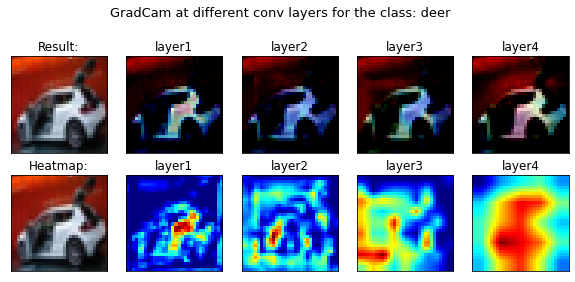

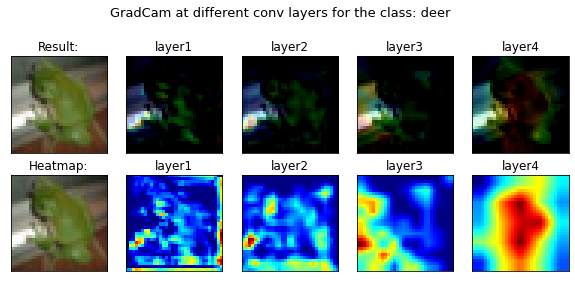

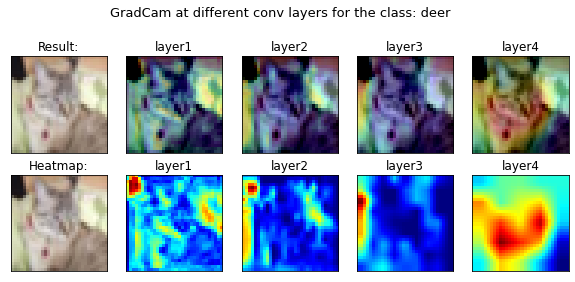

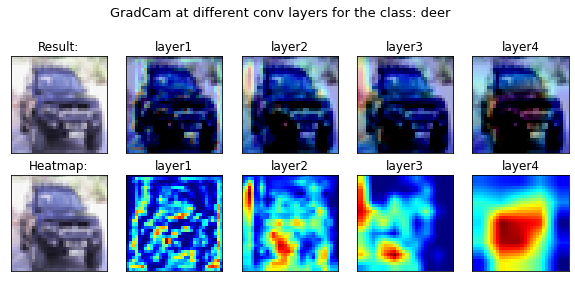

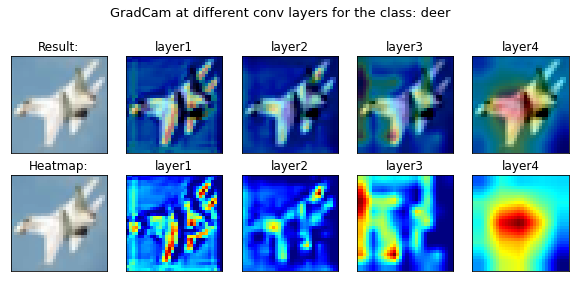

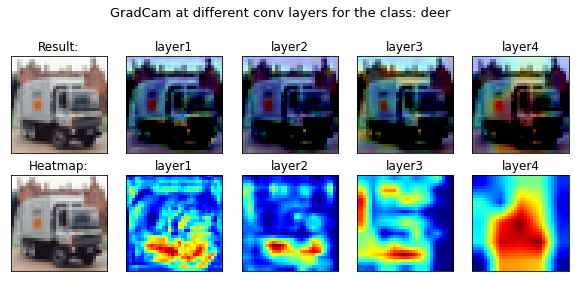

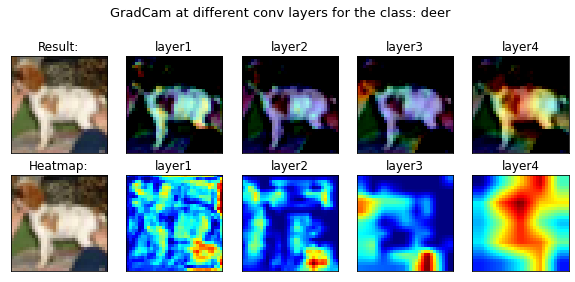

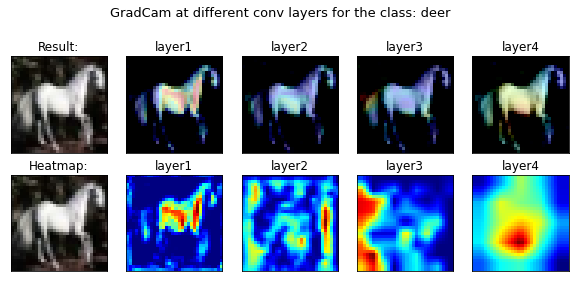

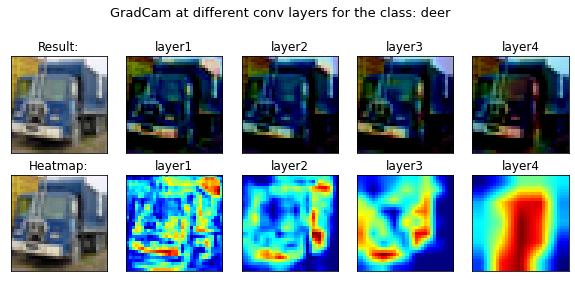

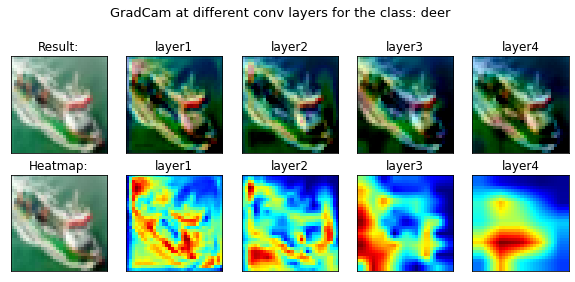

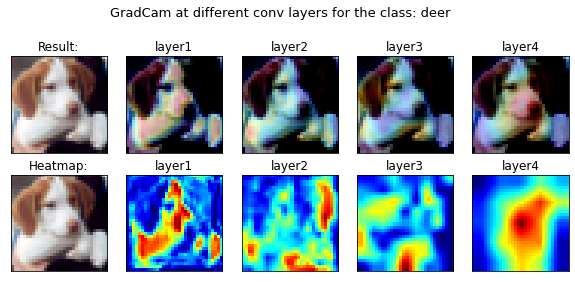

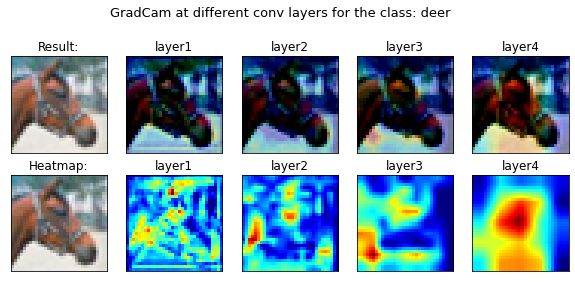

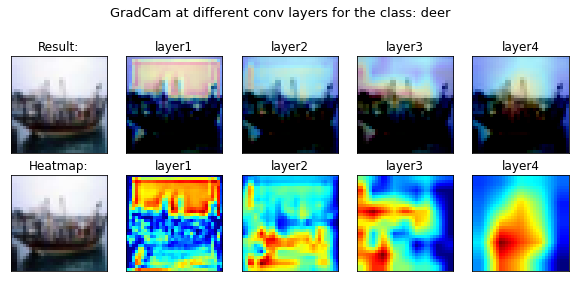

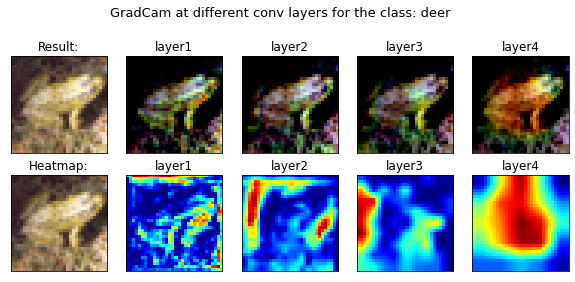

In [17]:
incorrect_pred_imgs = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")